In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [26]:
df=pd.read_csv('train.csv')
df.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


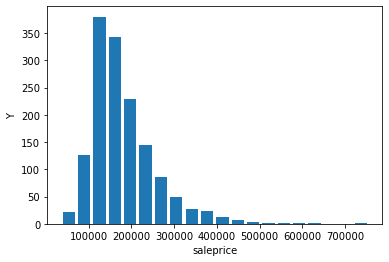

In [27]:
plt.hist(df.SalePrice,bins=20 ,rwidth=0.8)
plt.xlabel('saleprice')
plt.ylabel('Y')
plt.show()

In [28]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.00000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.000000,56.922550,70.045833,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,...,93.804661,46.645648,21.969157,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,421.321334,42.304033,24.294456,9984.675721,1.383171,1.113125,30.212814,20.645927,181.10815,456.142186,...,124.249421,66.276387,61.137400,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Left Skwed

In [29]:
df.shape

(1459, 81)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1200 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# So,What We learn



# 1.Some of the columns are having 90 or more than 90 % nan values.


# As we can See Alley is having 93 % nan

# 2.Columns are too much 80+.


In [31]:
del df['MiscFeature'] # 54 non-null     object
del df['Fence'] #281 non-null    object
del df['PoolQC']#7 non-null      object 
del df['Alley']#91 non-null     object 
del df['Id']#not needed

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# 3.Now We have to check the dependancies of the columns on House Price 

In [32]:
df['Street'].value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

In [33]:
df['Utilities'].value_counts()

AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64

In [34]:
del df['Street']
del df['Utilities']


In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1200 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   LotShape       1459 non-null   object 
 5   LandContour    1459 non-null   object 
 6   LotConfig      1459 non-null   object 
 7   LandSlope      1459 non-null   object 
 8   Neighborhood   1459 non-null   object 
 9   Condition1     1459 non-null   object 
 10  Condition2     1459 non-null   object 
 11  BldgType       1459 non-null   object 
 12  HouseStyle     1459 non-null   object 
 13  OverallQual    1459 non-null   int64  
 14  OverallCond    1459 non-null   int64  
 15  YearBuilt      1459 non-null   int64  
 16  YearRemodAdd   1459 non-null   int64  
 17  RoofStyle      1459 non-null   object 
 18  RoofMatl

In [36]:
df=df.fillna({'LotFrontage':df['LotFrontage'].mean()})
df=df.fillna({'MasVnrArea':df['MasVnrArea'].mean()})
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,Reg,Lvl,Inside,Gtl,Somerst,Norm,...,0,0,0,0,0,10,2009,WD,Normal,185000
1455,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [37]:
del df['FireplaceQu'] # more than 50 % of data is missing 


In [38]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,Reg,Lvl,Inside,Gtl,Somerst,Norm,...,0,0,0,0,0,10,2009,WD,Normal,185000
1455,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [39]:
df=df.fillna(method='ffill')

In [40]:
df=df.fillna(method='bfill')

In [41]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,Reg,Lvl,Inside,Gtl,Somerst,Norm,...,0,0,0,0,0,10,2009,WD,Normal,185000
1455,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   LotShape       1459 non-null   object 
 5   LandContour    1459 non-null   object 
 6   LotConfig      1459 non-null   object 
 7   LandSlope      1459 non-null   object 
 8   Neighborhood   1459 non-null   object 
 9   Condition1     1459 non-null   object 
 10  Condition2     1459 non-null   object 
 11  BldgType       1459 non-null   object 
 12  HouseStyle     1459 non-null   object 
 13  OverallQual    1459 non-null   int64  
 14  OverallCond    1459 non-null   int64  
 15  YearBuilt      1459 non-null   int64  
 16  YearRemodAdd   1459 non-null   int64  
 17  RoofStyle      1459 non-null   object 
 18  RoofMatl

In [43]:
corr=df.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790972
GrLivArea        0.708584
GarageCars       0.640383
GarageArea       0.623385
TotalBsmtSF      0.613792
1stFlrSF         0.605971
FullBath         0.560604
TotRmsAbvGrd     0.533682
YearBuilt        0.522877
YearRemodAdd     0.507015
MasVnrArea       0.475160
Fireplaces       0.466828
GarageYrBlt      0.454535
BsmtFinSF1       0.386783
LotFrontage      0.334992
WoodDeckSF       0.328881
2ndFlrSF         0.319193
OpenPorchSF      0.315980
HalfBath         0.284626
LotArea          0.263843
BsmtFullBath     0.227551
BsmtUnfSF        0.214281
BedroomAbvGr     0.168272
ScreenPorch      0.111378
PoolArea         0.092389
MoSold           0.046401
3SsnPorch        0.044553
BsmtFinSF2      -0.010952
BsmtHalfBath    -0.016915
MiscVal         -0.021216
LowQualFinSF    -0.025642
YrSold          -0.028884
OverallCond     -0.077754
MSSubClass      -0.084563
EnclosedPorch   -0.128695
KitchenAbvGr    -0.135979
Name: SalePrice, dtype: float64

In [44]:
del df['BsmtFinSF2']
del df['BsmtHalfBath'] 
del df['MiscVal'] 
del df['LowQualFinSF'] 
del df['YrSold'] 
del df['OverallCond'] 
del df['MSSubClass'] 
del df['KitchenAbvGr'] 
del df['EnclosedPorch'] 





C:\Users\Bilal\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


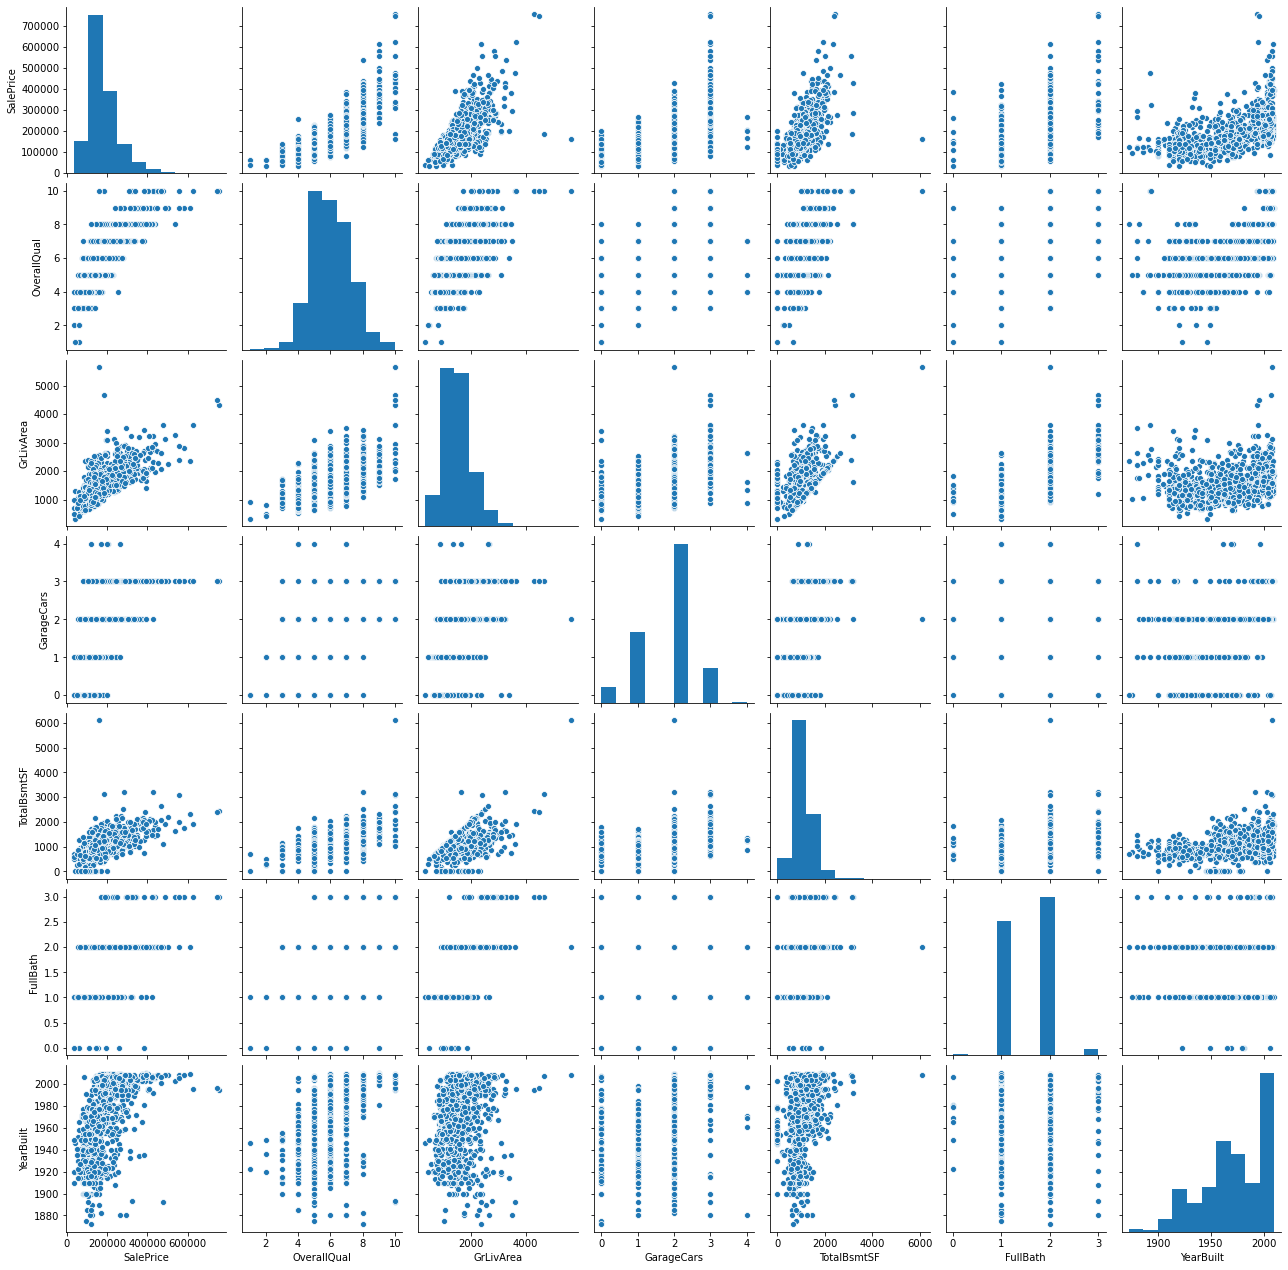

In [45]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [46]:
data=pd.get_dummies(data=df,drop_first=True)
data     

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,62.0,7500,7,2004,2005,0.0,410,811,1221,1221,...,0,0,0,0,1,0,0,0,1,0
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,0,0,0,0,1,0,0,0,1,0


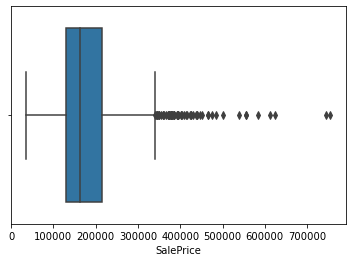

In [47]:
sns.boxplot(x=data['SalePrice'])

In [48]:
max_threshold=data['SalePrice'].quantile(0.95)
max_threshold

326199.99999999977

In [49]:
data=data[data['SalePrice']<max_threshold]


In [50]:
data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,62.0,7500,7,2004,2005,0.0,410,811,1221,1221,...,0,0,0,0,1,0,0,0,1,0
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,0,0,0,0,1,0,0,0,1,0


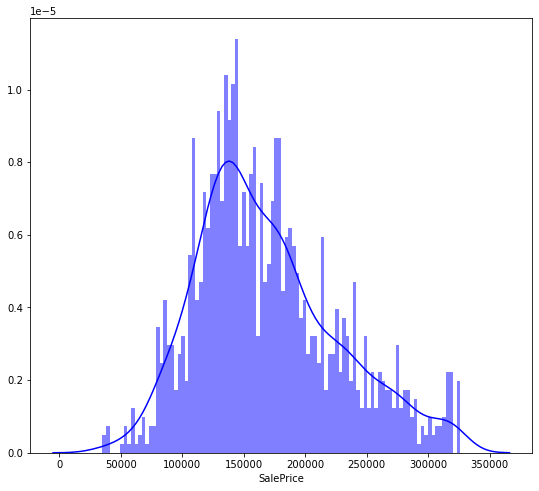

In [51]:
plt.figure(figsize=(9, 8))
sns.distplot(data['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.5});

# Modeling 

In [52]:
X = data.drop('SalePrice',axis=1)
y = data['SalePrice']
train_x, test_x, train_y, test_y = train_test_split(X, y,test_size=0.3,random_state=700)
model = LinearRegression()
model.fit(train_x, train_y)
y_predicted = model.predict(test_x)

In [53]:
from sklearn import metrics
print('simple Linear Regression')
print('MAE:', metrics.mean_absolute_error(test_y, y_predicted))
print('MSE:', metrics.mean_squared_error(test_y, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y,
y_predicted)))
r2_score(test_y, y_predicted)

simple Linear Regression
MAE: 13223.402673362532
MSE: 321236062.7963083
RMSE: 17923.05952666308


0.9039336472107872

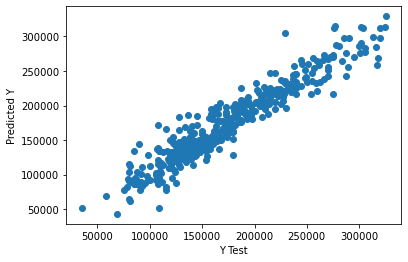

In [54]:
plt.scatter(test_y, y_predicted)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()



In [55]:
import sklearn.metrics as sm
print("Explain variance score =", round(sm.explained_variance_score(test_y, y_predicted), 2)) 


Explain variance score = 0.9
